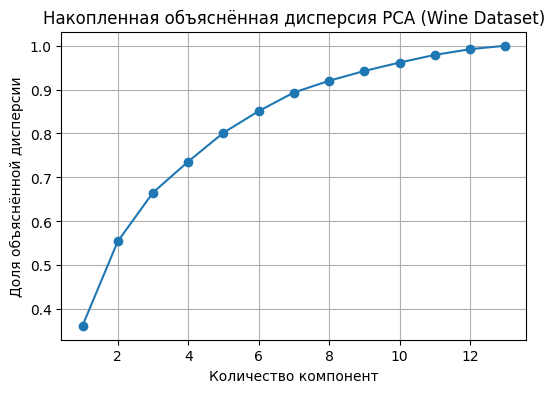

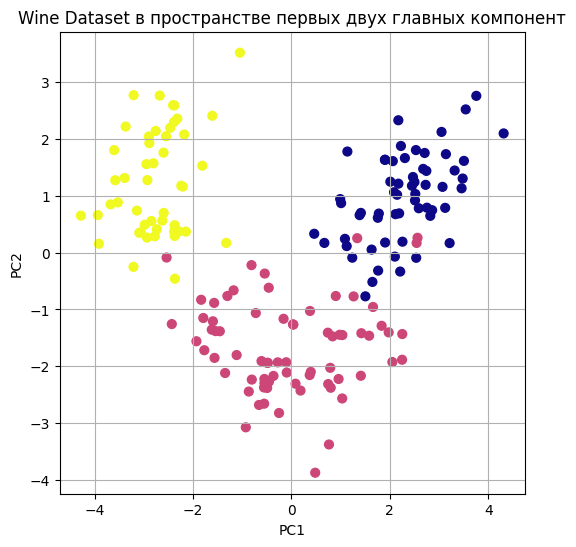

Без PCA: точность = 0.9815, время обучения = 0.0054 сек
С PCA (3 компоненты): точность = 0.9630, время обучения = 0.0041 сек
Прирост скорости обучения: 22.91%
Потеря качества модели: 1.89%


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import time

from qr import svd_from_eigen

wine = load_wine()
X, y = wine.data, wine.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

U, S, V = svd_from_eigen(X_scaled)
explained_variance = (np.diag(S) ** 2) / np.sum(np.diag(S) ** 2)
cum_var = np.cumsum(explained_variance)

plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o')
plt.title('Накопленная объяснённая дисперсия PCA (Wine Dataset)')
plt.xlabel('Количество компонент')
plt.ylabel('Доля объяснённой дисперсии')
plt.grid(True)
plt.show()

X_pca = X_scaled @ V[:, :2]
plt.figure(figsize=(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='plasma', s=40)
plt.title('Wine Dataset в пространстве первых двух главных компонент')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=500)
t1 = time.time(); model.fit(X_train, y_train); t2 = time.time()
acc_full = accuracy_score(y_test, model.predict(X_test))

X_pca_all = X_scaled @ V[:, :3]
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pca_all, y, test_size=0.3, random_state=42)
model_pca = LogisticRegression(max_iter=500)
t3 = time.time(); model_pca.fit(X_train_p, y_train_p); t4 = time.time()
acc_pca = accuracy_score(y_test_p, model_pca.predict(X_test_p))

print(f"Без PCA: точность = {acc_full:.4f}, время обучения = {t2 - t1:.4f} сек")
print(f"С PCA (3 компоненты): точность = {acc_pca:.4f}, время обучения = {t4 - t3:.4f} сек")

speed_gain = ((t2 - t1) - (t4 - t3)) / (t2 - t1) * 100
accuracy_loss = (acc_full - acc_pca) / acc_full * 100

print(f"Прирост скорости обучения: {speed_gain:.2f}%")
print(f"Потеря качества модели: {accuracy_loss:.2f}%")
